# Pytorch: MS Tytanic - Classification Example using a neural network with embedding

In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Wed Mar 11 07:58:05 2020


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I import data

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv')
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.shape

(891, 13)

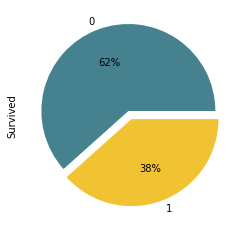

In [5]:
df.Survived.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#45818e', '#f1c232'], explode=(0.05, 0.05))

### I check data completeness and delete records with empty NaN values

In [6]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation of variables:  (891, 13)


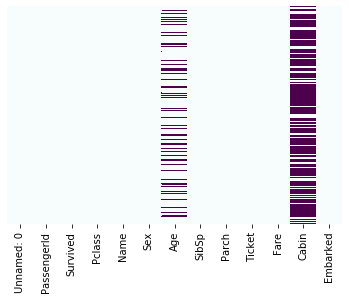

In [7]:
import seaborn as sns

print('Observation of variables: ',df.shape)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

### I delete several columns and empty records in Age columns

In [8]:
del df['Cabin']
del df['Ticket']
del df['Name']
del df['Unnamed: 0']

In [9]:
df=df.dropna(how='any')

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Arrangement of columns with categorical and continuous data

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
df.describe(include=["object"]).columns

Index(['Sex', 'Embarked'], dtype='object')

In [13]:
df.describe(include=[np.number]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:

categorical_columns = ['Sex', 'Embarked']
numerical_columns = ['PassengerId', 'Age', 'SibSp','Parch', 'Fare','Pclass']

In [15]:
df['Parch'].value_counts()

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### We determine that the output variable is the 'Stroke' column

In [16]:
outputs = ['Survived']

### Digitization of text variables

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

We need to convert types for qualitative columns to category. We can do this using the astype () function, as shown below:

## <span style="color:red">Introducing a new data type: 'category'</span>

In [18]:
for category in categorical_columns:
    df[category] = df[category].astype('category')

In [19]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [20]:
df['Sex'].cat.categories

Index(['female', 'male'], dtype='object')

In [21]:
df['Embarked'].cat.categories

Index(['C', 'Q', 'S'], dtype='object')

### Digitization of data

In [22]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

### Why did we digitize data in the format?

The basic purpose of separating categorical columns from numeric columns is that the values in the numeric column can be directly input into neural networks. However, categorized column values must first be converted to numeric types.

In [23]:
categorical_columns

['Sex', 'Embarked']

### Conversion of categorical variables to Numpy matrix

In [24]:
p1 = df['Sex'].cat.codes.values
p2 = df['Embarked'].cat.codes.values


NumP_matrix = np.stack([p1, p2], 1)

NumP_matrix[:10]


array([[1, 2],
       [0, 0],
       [0, 2],
       [0, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [0, 2],
       [0, 0],
       [0, 2]], dtype=int8)

### Creating a Pytorch tensor from the Numpy matrix

In [25]:
categorical_data = torch.tensor(NumP_matrix, dtype=torch.int64)
categorical_data[:10]

tensor([[1, 2],
        [0, 0],
        [0, 2],
        [0, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [0, 0],
        [0, 2]])

### Conversion of DataFrame numeric columns to a Pytorch tensor

In [26]:
numerical_data = np.stack([df[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]

tensor([[ 1.0000, 22.0000,  1.0000,  0.0000,  7.2500,  3.0000],
        [ 2.0000, 38.0000,  1.0000,  0.0000, 71.2833,  1.0000],
        [ 3.0000, 26.0000,  0.0000,  0.0000,  7.9250,  3.0000],
        [ 4.0000, 35.0000,  1.0000,  0.0000, 53.1000,  1.0000],
        [ 5.0000, 35.0000,  0.0000,  0.0000,  8.0500,  3.0000]])

### Convert result variables to the Pytorch tensor

In [27]:
outputs = torch.tensor(df[outputs].values).flatten()
outputs[:5]

tensor([0, 1, 1, 1, 0])

### Let's sum up the tensors

In [28]:
print('categorical_data: ',categorical_data.shape)
print('numerical_data:   ',numerical_data.shape)
print('outputs:          ',outputs.shape)

categorical_data:  torch.Size([712, 2])
numerical_data:    torch.Size([712, 6])
outputs:           torch.Size([712])


## <span style="color:red">settlement</span>
We have transformed our categorical columns into numerical ones, in which the unique value is represented by one integer (digitization - e.g. smoker is 1). Based on such a column (variable), we can train the model, but there is a better way ...

A better way is to represent the value in a categorical column as an N-dimensional vector instead of a single integer. This process is called deposition. The vector is able to capture more information and can find relationships between different categorical values ​​in a more appropriate way. Therefore, we will represent values ​​in categorical columns in the form of N-dimensional vectors.

We need to define the embedding size (vector dimensions) for all qualitative columns. There is no hard and fast rule regarding the number of dimensions. A good rule for defining the embedding size for a column is to divide the number of unique values ​​in the column by 2 (but not more than 50).


The script below creates a tuple containing the number of unique values and dimension sizes for all quality columns.

The rule is simple: the embedding matrix must always be in the number of rows greater than the range of variables in the number of rows: that's why I added col_size + 2, it's a big stock.

In [29]:
categorical_column_sizes = [len(df[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size+2, min(50, (col_size+5)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 3), (5, 4)]


### Dzielenie zestawu na szkoleniowy i testowy

In [30]:
total_records = df['Age'].count()
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

Aby sprawdzić, czy poprawnie podzieliliśmy dane na zestawy treningów i testów, wydrukujmy długości rekordów szkolenia i testów:

In [31]:
print('categorical_train_data: ',categorical_train_data.shape)
print('numerical_train_data:   ',numerical_train_data.shape)
print('train_outputs:          ', train_outputs.shape)
print('----------------------------------------------------')
print('categorical_test_data:  ',categorical_test_data.shape)
print('numerical_test_data:    ',numerical_test_data.shape)
print('test_outputs:           ',test_outputs.shape)

categorical_train_data:  torch.Size([570, 2])
numerical_train_data:    torch.Size([570, 6])
train_outputs:           torch.Size([570])
----------------------------------------------------
categorical_test_data:   torch.Size([142, 2])
numerical_test_data:     torch.Size([142, 6])
test_outputs:            torch.Size([142])


### Creating the Pytorch classification model

In [32]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [33]:
print('categorical_embedding_sizes:  ',categorical_embedding_sizes)
print(numerical_data.shape[1])

categorical_embedding_sizes:   [(4, 3), (5, 4)]
6


In [34]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,100,50], p=0.4)

In [35]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(5, 4)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)


### Creating a loss function

In [36]:
#loss_function = torch.nn.MSELoss(reduction='sum')
loss_function = nn.CrossEntropyLoss()
#loss_function = nn.BCEWithLogitsLoss()

### Defining the optimizer

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#optimizer = torch.optim.Rprop(model.parameters(), lr=0.001, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

In [38]:
print('categorical_embedding_sizes:  ',categorical_embedding_sizes)
print(numerical_data.shape[1])
print('categorical_train_data: ',categorical_train_data.shape)
print('numerical_train_data:   ',numerical_train_data.shape)
print('outputs:                ',train_outputs.shape)

categorical_embedding_sizes:   [(4, 3), (5, 4)]
6
categorical_train_data:  torch.Size([570, 2])
numerical_train_data:    torch.Size([570, 6])
outputs:                 torch.Size([570])


In [39]:
y_pred = model(categorical_train_data, numerical_train_data)

In [40]:
epochs = 1600
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%50 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.75798762
epoch:  51 loss: 0.46794149
epoch: 101 loss: 0.40129563
epoch: 151 loss: 0.36819917
epoch: 201 loss: 0.38335440
epoch: 251 loss: 0.34457776
epoch: 301 loss: 0.34096593
epoch: 351 loss: 0.33481178
epoch: 401 loss: 0.31270745
epoch: 451 loss: 0.28896174
epoch: 501 loss: 0.30315563
epoch: 551 loss: 0.28325975
epoch: 601 loss: 0.28311190
epoch: 651 loss: 0.28181159
epoch: 701 loss: 0.25203362
epoch: 751 loss: 0.23067927
epoch: 801 loss: 0.22721779
epoch: 851 loss: 0.21823877
epoch: 901 loss: 0.23612224
epoch: 951 loss: 0.19916874
epoch: 1001 loss: 0.18573402
epoch: 1051 loss: 0.19601844
epoch: 1101 loss: 0.21755174
epoch: 1151 loss: 0.16066019
epoch: 1201 loss: 0.19210535
epoch: 1251 loss: 0.18088962
epoch: 1301 loss: 0.20280677
epoch: 1351 loss: 0.17518044
epoch: 1401 loss: 0.17039256
epoch: 1451 loss: 0.13132723
epoch: 1501 loss: 0.15249592
epoch: 1551 loss: 0.15695214
epoch: 1600 loss: 0.1524524987


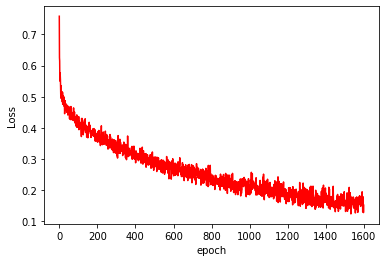

In [41]:
plt.plot(range(epochs), aggregated_losses, color='r')
plt.ylabel('Loss')
plt.xlabel('epoch');

### Forecast based on the model

In [42]:
with torch.no_grad():
    y_val_train = model(categorical_train_data, numerical_train_data)
    loss = loss_function( y_val_train, train_outputs)
print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.19752462


In [43]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.76465970


Because we've determined that our output layer will contain 2 neurons, each forecast will contain 2 values. For example, the first 5 predicted values are:

In [44]:
print(y_val[:5])

tensor([[ 1.4549, -2.7559],
        [-7.8097,  6.2669],
        [ 1.6351, -1.9715],
        [-0.3592,  0.2070],
        [ 4.8382, -6.4910]])


The purpose of such forecasts is that if the actual result is 0, the value at index 0 should be higher than the value at index 1 and vice versa. We can get the largest value index from the list using the following script:

In [45]:
y_val = np.argmax(y_val, axis=1)

The above equation returns the maximum value indicators along the axis.

In [46]:
print(y_val[:195])

tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0])


Because in the list of originally predicted results for the first five records, the values at zero indexes are greater than the values at the first indexes, we can see 0 in the first five rows of processed output.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[74 13]
 [16 39]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        87
           1       0.75      0.71      0.73        55

    accuracy                           0.80       142
   macro avg       0.79      0.78      0.78       142
weighted avg       0.79      0.80      0.79       142

0.795774647887324


### We save the whole model

In [48]:
torch.save(model,'/home/wojciech/Pulpit/3/byk2.pb')

/home/wojciech/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### We play the whole model

In [49]:
KOT = torch.load('/home/wojciech/Pulpit/3/byk2.pb')
KOT.eval()

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(5, 4)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)

### By substituting other independent variables, one can get the vector of output variables

In [50]:
A = categorical_train_data[::5]
A

tensor([[1, 2],
        [1, 2],
        [0, 2],
        [1, 1],
        [1, 2],
        [1, 2],
        [0, 0],
        [0, 2],
        [1, 0],
        [1, 0],
        [0, 2],
        [1, 0],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [1, 2],
        [0, 0],
        [1, 1],
        [1, 0],
        [1, 2],
        [1, 2],
        [1, 0],
        [1, 2],
        [1, 2],
        [0, 1],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [1, 0],
        [1, 2],
        [0, 0],
        [1, 2],
        [0, 2],
        [0, 2],
        [1, 2],
        [1, 2],
        [1, 0],
        [0, 0],
        [0, 0],
        [1, 2],
        [0, 0],
        [0, 0],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [0, 2],
        [1, 2],
        [1, 2],
        [1, 0],
        [1, 2],
        

In [51]:
B = numerical_train_data[::5]
B

tensor([[  1.0000,  22.0000,   1.0000,   0.0000,   7.2500,   3.0000],
        [  7.0000,  54.0000,   0.0000,   0.0000,  51.8625,   1.0000],
        [ 12.0000,  58.0000,   0.0000,   0.0000,  26.5500,   1.0000],
        [ 17.0000,   2.0000,   4.0000,   1.0000,  29.1250,   3.0000],
        [ 24.0000,  28.0000,   0.0000,   0.0000,  35.5000,   1.0000],
        [ 34.0000,  66.0000,   0.0000,   0.0000,  10.5000,   2.0000],
        [ 40.0000,  14.0000,   1.0000,   0.0000,  11.2417,   3.0000],
        [ 50.0000,  18.0000,   1.0000,   0.0000,  17.8000,   3.0000],
        [ 55.0000,  65.0000,   0.0000,   1.0000,  61.9792,   1.0000],
        [ 61.0000,  22.0000,   0.0000,   0.0000,   7.2292,   3.0000],
        [ 69.0000,  17.0000,   4.0000,   2.0000,   7.9250,   3.0000],
        [ 74.0000,  26.0000,   1.0000,   0.0000,  14.4542,   3.0000],
        [ 81.0000,  22.0000,   0.0000,   0.0000,   9.0000,   3.0000],
        [ 87.0000,  16.0000,   1.0000,   3.0000,  34.3750,   3.0000],
        [ 93.0000,  

In [52]:
y =train_outputs[::5]

In [53]:
y_pred_AB = KOT(A, B)
y_pred_AB[:10]

tensor([[ 3.1183, -3.6037],
        [ 3.6648, -4.4968],
        [-5.4060,  4.7106],
        [ 6.0832, -8.2568],
        [-2.7152,  2.8045],
        [ 3.1732, -5.2538],
        [-3.1322,  3.1460],
        [ 2.4081, -2.8837],
        [ 5.9845, -7.8051],
        [ 1.7470, -2.0218]], grad_fn=<SliceBackward>)

In [54]:
with torch.no_grad():
    y_val_AB = KOT(A,B)
    loss = loss_function( y_val_AB, y)
print(f'Loss train_set: {loss:.8f}')

Loss train_set: 0.06691397


In [55]:
y_val = np.argmax(y_val_AB, axis=1)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y,y_val))
print(classification_report(y,y_val))
print(accuracy_score(y, y_val))

[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544


In [57]:
print('Measuring the time to complete this task:')
print((time.time() - start_time)/60) ## koniec pomiaru czasu

Measuring the time to complete this task:
0.7621555407842
